In [17]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = "svg"

### 散点图

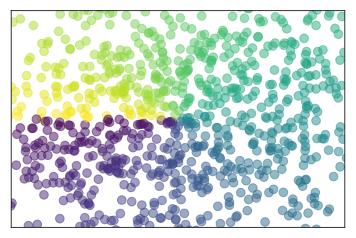

In [18]:
# 散点图
n = 1024    # data size
# 制造点集
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value

# 输入X和Y作为location，size=75，颜色为T，color map用默认值，透明度alpha 为 50%。
plt.scatter(X, Y, s=75, c=T, alpha=.5)

# x轴显示范围定位(-1.5，1.5)，并用xtick()函数来隐藏x坐标轴，y轴
plt.xlim(-1.5, 1.5)
plt.xticks(())  # ignore xticks
plt.ylim(-1.5, 1.5)
plt.yticks(())  # ignore yticks

plt.show()

### 柱状图

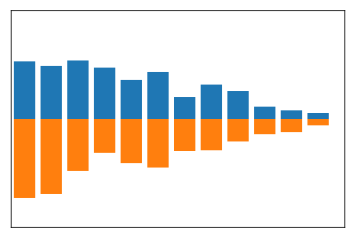

In [19]:
# 柱状图

# 向上向下分别生成12个数据，X为 0 到 11 的整数 ，Y是相应的均匀分布的随机数据
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

# 绘制出bar
plt.bar(X, +Y1)
plt.bar(X, -Y2)

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

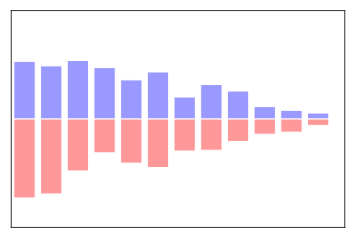

In [20]:
# 更改颜色
plt.bar(X, +Y1,facecolor="#9999ff",edgecolor="white")
plt.bar(X, -Y2,facecolor="#ff9999",edgecolor="white")

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

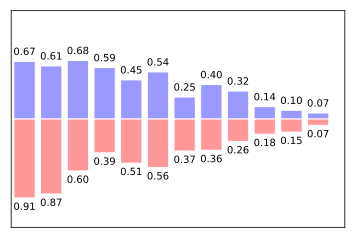

In [21]:
# 增加数值
# 用函数plt.text分别在柱体上方（下方）加上数值
# 用%.2f保留两位小数，横向居中对齐ha='center'，纵向底部（顶部）对齐va='bottom'
plt.bar(X, +Y1,facecolor="#9999ff",edgecolor="white")
plt.bar(X, -Y2,facecolor="#ff9999",edgecolor="white")

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

for x, y in zip(X, Y1):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x , y + 0.05 , '%.2f' % y, ha='center', va='bottom')

for x, y in zip(X, Y2):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, -y - 0.05, '%.2f' % y, ha='center', va='top')
    
plt.show()

### Contours等高线图

([], <a list of 0 Text yticklabel objects>)

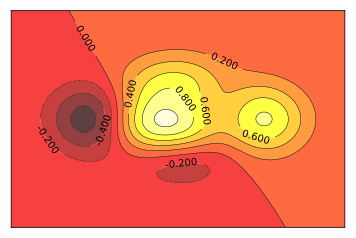

In [23]:
# 画等高线
def f(x,y):
    # the height function
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

# 数据集即三维点 (x,y) 和对应的高度值，共有256个点。高度值使用一个 height function f(x,y) 生成。
# x, y 分别是在区间 [-3,3] 中均匀分布的256个值
# 并用meshgrid在二维平面中将每一个x和每一个y分别对应起来，编织成栅格:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

# 使用函数plt.contourf把颜色加进去
# 位置参数分别为：X, Y, f(X,Y)。透明度0.75
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)

# 使用plt.contour函数划线。位置参数为：X, Y, f(X,Y)。颜色选黑色，线条宽度选0.5
# 8代表等高线的密集程度,如果是0，则图像被一分为二
C = plt.contour(X, Y, f(X, Y), 8, colors='black',linewidths = .5)
# 添加高度数字,inline控制是否将Label画在线里面，字体大小为10,坐标隐藏
plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())
plt.yticks(())

### Image图片

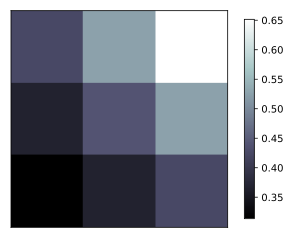

In [25]:
# 随机矩阵画图
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)
# origin='lower'代表的就是选择的原点的位置。
plt.imshow(a, interpolation='nearest', cmap='bone', origin='lower')
# 图像注释，shrink参数，使colorbar的长度变短为原来的92%：
plt.colorbar(shrink=.92)

plt.xticks(())
plt.yticks(())
plt.show()

### 3D数据

In [26]:
# 需要导入Axes 3D
from mpl_toolkits.mplot3d import Axes3D

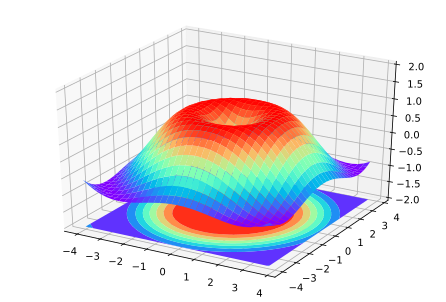

In [29]:
# 定义一个图像窗口，在窗口上添加3D坐标轴
fig = plt.figure()
ax = Axes3D(fig)
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R) # 每一个（x,y)点对应的高度值

# 画出一个三维曲面
# rstride 和 cstride 分别代表 row 和 column 的跨度，应该可以理解为间距吧
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

# 画出三维曲面在X-Y平面的等高线，zdir="z"代表X-Y平面
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))

ax.set_zlim(-2, 2)

plt.show()